## Wine Clustering
- 아래 와인 데이터를 이용하여 와인을 클러스터링하고 보고서를 작성하세요.
- 코드, 클러스터링 결과, 보고서를 종합적으로 평가합니다.
- 다음 사이트의 다양한 클러스터링 기법을 참조하세요.
- https://scikit-learn.org/stable/modules/clustering.html

In [1]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering,SpectralClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [2]:
X=wine['data']
y=wine['target']

In [3]:
X.shape, y.shape

((178, 13), (178,))

### Answer

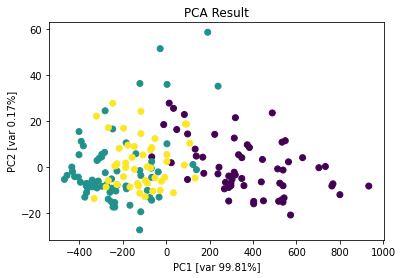

PC 1) 
 Components:	[ 1.65926472e-03 -6.81015556e-04  1.94905742e-04 -4.67130058e-03
  1.78680075e-02  9.89829680e-04  1.56728830e-03 -1.23086662e-04
  6.00607792e-04  2.32714319e-03  1.71380037e-04  7.04931645e-04
  9.99822937e-01]
 variance:	99.80912304918974%
PC 2) 
 Components:	[ 1.20340617e-03  2.15498184e-03  4.59369254e-03  2.64503930e-02
  9.99344186e-01  8.77962152e-04 -5.18507284e-05 -1.35447892e-03
  5.00440040e-03  1.51003530e-02 -7.62673115e-04 -3.49536431e-03
 -1.77738095e-02]
 variance:	0.17359156247057506%


In [4]:
pca=PCA(n_components=2)
pca.fit(X)
pca_X=pca.fit_transform(X)
plt.scatter(*(np.transpose(pca_X)),c=y)
plt.xlabel("PC1 [var "+str(round(pca.explained_variance_ratio_[0]*100,2))+'%]')
plt.ylabel("PC2 [var "+str(round(pca.explained_variance_ratio_[1]*100,2))+'%]')
plt.title("PCA Result")
plt.show()

for idx,ra_co in enumerate(zip(pca.explained_variance_ratio_,pca.components_)):
    print('PC '+str(idx+1)+') \n Components:\t'+str(ra_co[1])+'\n variance:\t'+str(ra_co[0]*100)+'%')

### Kmeans Clustering

In [5]:
def corrected_label(data,kmeans,cen,labels=False):
    right_label=[]
    for idx in set(kmeans.labels_):
        kcen=data[kmeans.labels_==idx].mean(axis=0)
        distance=[np.sum((kcen-cen[jdx])**2) for jdx in range(3)]
        right_label.append(np.argmin(distance))
    corrected_label=map(lambda x: right_label[0] if x==list(set(kmeans.labels_))[0]
                         else right_label[1] if x==list(set(kmeans.labels_))[1]
                         else right_label[2]
                        ,kmeans.labels_)
    if labels:
        print(list(set(kmeans.labels_)),'=>',right_label)
    return np.array(list(corrected_label))

위 함수는 kmean clustering 과정에서 labeling이 달라지는 것을 막기 위한 함수이다. 이 함수는 clustering한 각 그룹의 평균값과 실제 각 그룹의 평균값과의 거리를 비교하여, label을 맞추어 준다.

In [6]:
cen=[X[y==idx].mean(axis=0) for idx in range(3)]

In [7]:
kmeans=KMeans(n_clusters=3).fit(X)
print("Answer:",y)
print("Predict:",corrected_label(X,kmeans,cen))
print("accuracy:",round(sum(y==corrected_label(X,kmeans,cen))/len(y)*100,2),"%")

Answer: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Predict: [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0 0 0 0 0 0 2 2
 0 0 2 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 2 1 1 2 2 2 1 1 0
 2 1 1 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 2 2 1 2 1 2 1 1 1 2 1 1 1 1 2 1
 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 2 2 2 2 1 1 1 2 2 1 1 2 2 1 2
 2 1 1 1 1 2 2 2 1 2 2 2 1 2 1 2 2 1 2 2 2 2 1 1 2 2 2 2 2 1]
accuracy: 70.22 %


[0, 1, 2] => [2, 0, 1]


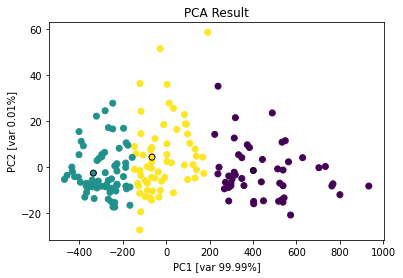

In [9]:
plt.scatter(*(np.transpose(pca_X)),c=corrected_label(X,kmeans,cen,labels=True))
plt.xlabel("PC1 [var "+str(round(pca.explained_variance_ratio_[0]*100,2))+'%]')
plt.ylabel("PC2 [var "+str(round(pca.explained_variance_ratio_[1]*100,2))+'%]')
plt.scatter(*np.transpose(pca.fit_transform(kmeans.cluster_centers_)),c=[2,0,1],edgecolors='black')
plt.title("PCA Result")
plt.show()

단순하게 데이터를 kmean Clustering을 할 때는 PCA 그래프에서도 볼 수 있듯이 겹치는 부분이 많아서 70.22%로 잘 분류되지 않았다.

### Normalization + Kmean Clustering

- Normalization

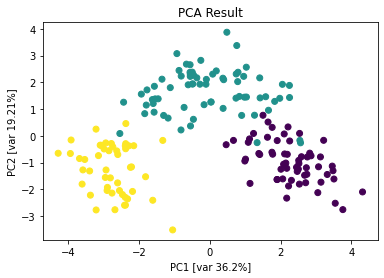

In [11]:
nor=StandardScaler()
nor.fit(X)
nor_X=nor.transform(X)
cen_nor=[nor_X[y==idx].mean(axis=0) for idx in range(3)]
pca_nor_X=pca.fit_transform(nor_X)

plt.scatter(*(np.transpose(pca_nor_X)),c=y)
plt.xlabel("PC1 [var "+str(round(pca.explained_variance_ratio_[0]*100,2))+'%]')
plt.ylabel("PC2 [var "+str(round(pca.explained_variance_ratio_[1]*100,2))+'%]')
plt.title("PCA Result")
plt.show()

- Kmeans Clustering

In [13]:
kmeans_nor=KMeans(n_clusters=3).fit(nor_X)
print("Answer:",y)
print("Predict:",corrected_label(nor_X,kmeans_nor,cen_nor))
print("accuracy:",round(sum(y==corrected_label(nor_X,kmeans_nor,cen_nor))/len(y)*100,2),"%")

Answer: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Predict: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
accuracy: 96.63 %


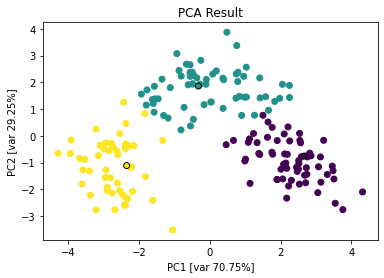

In [19]:
plt.scatter(*(np.transpose(pca_nor_X)),c=corrected_label(nor_X,kmeans_nor,cen_nor))
plt.xlabel("PC1 [var "+str(round(pca.explained_variance_ratio_[0]*100,2))+'%]')
plt.ylabel("PC2 [var "+str(round(pca.explained_variance_ratio_[1]*100,2))+'%]')
plt.title("PCA Result")
plt.scatter(*np.transpose(pca.fit_transform(kmeans_nor.cluster_centers_)),c=[2,0,1],edgecolors='black')
plt.show()

데이터를 Normalization을 각 그룹별로 데이터가 적절하게 떨어져 있는 것을 PCA graph를 통해서 알 수 있었고, 실제로 이 데이터를 기반으로 kmean clustering은 96.63%로 높은 정확도를 보여주고 있다.

### PCA + Normalization + k-mean clustering

In [22]:
cen_pca_nor=[pca_nor_X[y==idx].mean(axis=0) for idx in range(3)]

In [23]:
kmeans_pca=KMeans(n_clusters=3).fit(pca_nor_X)
print("Answer:",y)
print("Predict:",corrected_label(pca_nor_X,kmeans_pca,cen_pca_nor))
print("accuracy:",round(sum(y==corrected_label(pca_nor_X,kmeans_pca,cen_pca_nor))/len(y)*100,2),"%")

Answer: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Predict: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
accuracy: 96.63 %


새로운 방식으로 17차원의 데이터가 아닌 PCA를 한 2차원의 데이터로 kmean clustering을 시도해 보았지만 결과의 큰 변화는 찾지 못했다.

### DBSCAN

<div>
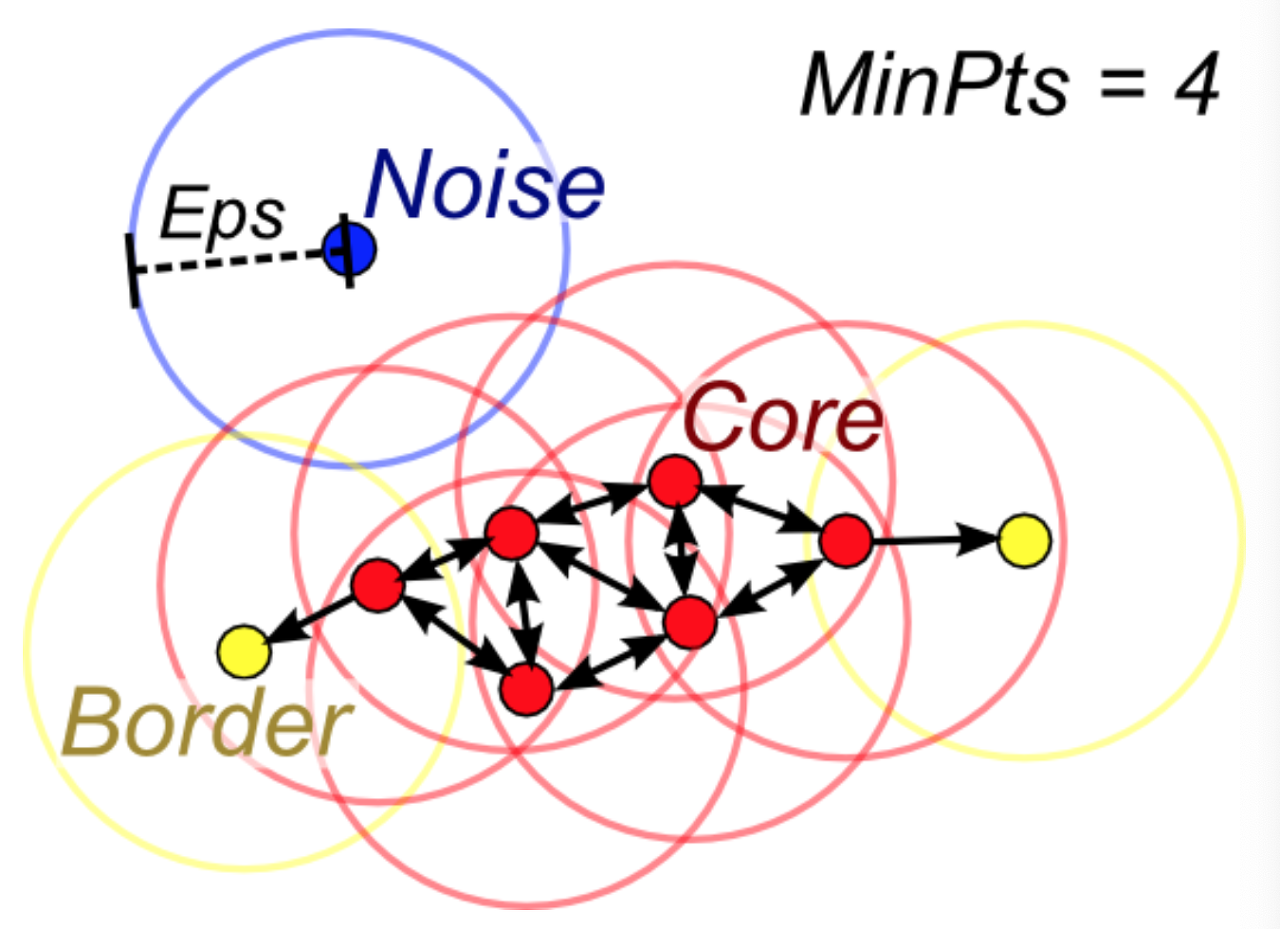
</div>

DBSCAN은 밀도를 기반으로 Clustering 하는 방식이다. core point를 기준으로 반경을 그리고, 해당 반경 안에 특정 개수의 점이 들어오면 그 그룹을 한 그룹으로 보는 방식이다. 만약 어떤 core point가 다른 core point의 그룹에 속하면, 두 core point에 속한 점들을 한 그룹으로 본다.


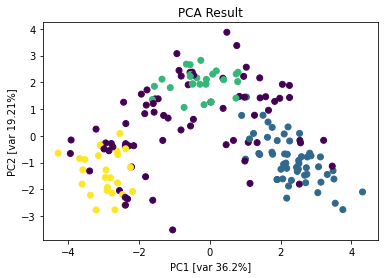

Answer: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Predicted: [ 0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0  0
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1  0 -1  0 -1  0  0
  0  0 -1  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1  0 -1  1 -1 -1 -1 -1
  1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1  2 -1  1 -1 -1  1  1  1  1 -1  1 -1 -1
 -1 -1 -1 -1  1  1  1  1  1 -1  1  1  1 -1 -1  1 -1 -1  1 -1  1  1 -1  1
  1 -1 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1  2
 -1  2  2  2  2  2 -1 -1 -1  2 -1  2  2 -1 -1 -1  2  2 -1  2  2  2  2  2
  2 -1 -1  2  2  2  2  2 -1  2]
[0, 1, 2, -1] => [0, 1, 2, 1]
accuracy: 69.66 %


In [159]:
dbscan=DBSCAN(eps=1.14*np.sqrt(17/4), min_samples=12).fit(nor_X)
#eps는 원의 반경, min_sample은 그룹으로 인정할 해당 반경 안에 들어올 최소점의 개수이다.

plt.scatter(*(np.transpose(pca_nor_X)),c=dbscan.labels_)
plt.xlabel("PC1 [var "+str(round(pca.explained_variance_ratio_[0]*100,2))+'%]')
plt.ylabel("PC2 [var "+str(round(pca.explained_variance_ratio_[1]*100,2))+'%]')
plt.title("PCA Result")
plt.show()
print("Answer:",y)
print("Predicted:",dbscan.labels_)
print("accuracy:",round(sum(y==corrected_label(nor_X,dbscan,cen_nor,labels=True))/len(y)*100,2),"%")

DBSCAN의 경우 Sample의 개수를 입력하지 않아도 되는 장점이 있지만, 현재는 그룹이 세 가지라는 것을 알고 있다. 그렇기에 이를 사용하지 않고 세 그룹으로 분류할 때까지 데이터를 파라미터를 조정해야 하지만, 이는 쉬운 일이 아니다. 특히 wine 데이터에서는 normalization을 통해 데이터를 그룹별로 잘 분류되게 만들었어도, 서로 겹치는 부분이 존재해서 DBSCAN에서 한 그룹으로 분류한다.

### T-SNE + DBSCAN

T-SNE는 차원을 축소하는 과정에서 고차원에서 근처에 있던 점들이 축소된 차원에서도 근처에 있게 한다. 이를 위해서 T-SNE는 각 점에서 Gaussian 분포를 이용해서 근처 값들을 수치화하여, 근처에 있는 점은 더 가까이 오도록 한다. 따라서, TSNE를 너무 많이 반복하면, 모든 값들이 한 곳에 모이는 현상이 발생한다는 주의점도 있다.

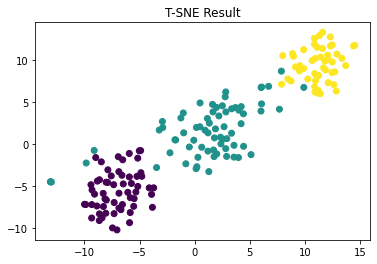

In [98]:
from sklearn.manifold import TSNE

tsne = TSNE(learning_rate=340)
tsne_nor_X = tsne.fit_transform(nor_X)
plt.scatter(*np.transpose(tsne_nor_X),c=y)
plt.title("T-SNE Result")
plt.show()

In [99]:
cen_tsne=[tsne_nor_X[y==idx].mean(axis=0) for idx in range(3)]

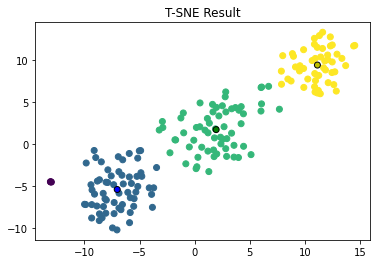

Answer: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Predicted: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 1 0 1 0
 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[0, 1, 2, -1] => [0, 1, 2, 0]
accuracy: 95.51 %


In [105]:
dbscan_tsne=DBSCAN(eps=1.15*np.sqrt(17/4), min_samples=9).fit(tsne_nor_X)
plt.scatter(*(np.transpose(tsne_nor_X)),c=dbscan_tsne.labels_)
plt.title("T-SNE Result")

cen_db=[tsne_nor_X[dbscan_tsne.labels_==idx].mean(axis=0) for idx in [0,1,2]]
plt.scatter(*(np.transpose(cen_db)),c=['b','g','y'],edgecolors='black')
plt.show()

print("Answer:",y)
print("Predicted:",corrected_label(tsne_nor_X,dbscan_tsne,cen_tsne))
print("accuracy:",round(sum(y==corrected_label(tsne_nor_X,dbscan_tsne,cen_tsne,labels=True))/len(y)*100,2),"%")

T-SNE를 이용해서 차원 축소를 한 결과 DBSCAN의 결과가 향상되었음을 알 수 있다. 이는 T-SNE가 근처에 있는 점들이 차원을 축소해도 근처에 있게 하기 때문에 밀도를 기준으로 하는 DBSCAN와 같이 적용하는 것이 효과적이기 때문이다. 하지만, PCA와 달리 T-SNE는 항상 같은 분포를 주지 않아서, 분류의 안정성에 문제가 있다는 단점이 있다.

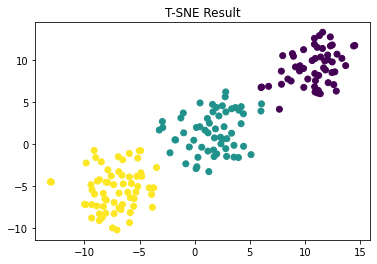

Answer: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Predicted: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 1 1 1 1 1 1 2 0 1 0 1 0
 1 1 1 1 0 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[0, 1, 2] => [2, 1, 0]
accuracy: 93.26 %


In [106]:
kmeans_tsne=KMeans(n_clusters=3).fit(tsne_nor_X)
plt.scatter(*(np.transpose(tsne_nor_X)),c=kmeans_tsne.labels_)
plt.title("T-SNE Result")
plt.show()

print("Answer:",y)
print("Predicted:",corrected_label(tsne_nor_X,kmeans_tsne,cen_tsne))
print("accuracy:",round(sum(y==corrected_label(tsne_nor_X,kmeans_tsne,cen_tsne,labels=True))/len(y)*100,2),"%")

추가적으로 T-SNE한 데이터를 기준으로 했을 경우 오히려 Kmean clustering한 경우에서는 오히려 정확도가 더 떨어진다.

### Hierarchical clustering

In [107]:
HC_nor = AgglomerativeClustering(n_clusters=3,linkage='ward').fit(nor_X)
HC_tsne = AgglomerativeClustering(n_clusters=3,linkage='ward').fit(tsne_nor_X)


print("Answer:",y,'\n')

print("Nor Prediction:",corrected_label(nor_X,HC_nor,cen_nor))
print("accuracy:",round(sum(y==corrected_label(nor_X,HC_nor,cen_nor))/len(y)*100,2),"%",'\n')

print("T-SNE Prediction:",corrected_label(tsne_nor_X,HC_tsne,cen_tsne))
print("accuracy:",round(sum(y==corrected_label(tsne_nor_X,HC_tsne,cen_tsne))/len(y)*100,2),"%",'\n')

Answer: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] 

Nor Prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 1 1 1 0 0 1 2 1 2 0 1 0
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
accuracy: 92.7 % 

T-SNE Prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0
 1 1 1 1 0 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 

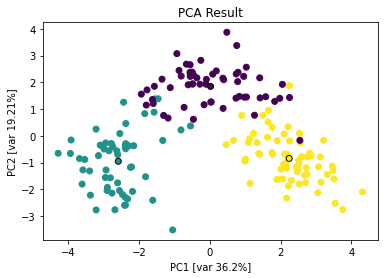

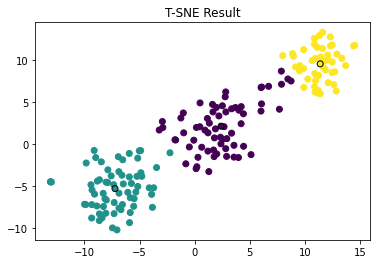

In [108]:
plt.figure('HC_PCA.Result')
plt.scatter(*(np.transpose(pca_nor_X)),c=HC_nor.labels_)
plt.xlabel("PC1 [var "+str(round(pca.explained_variance_ratio_[0]*100,2))+'%]')
plt.ylabel("PC2 [var "+str(round(pca.explained_variance_ratio_[1]*100,2))+'%]')
plt.title("PCA Result")
cen_HC=[pca_nor_X[HC_nor.labels_==idx].mean(axis=0) for idx in [0,1,2]]
plt.scatter(*(np.transpose(cen_HC)),c=[0,1,2],edgecolors='Black')


plt.figure('HC_TNSE.Result')
plt.scatter(*(np.transpose(tsne_nor_X)),c=HC_tsne.labels_)
cen_HC=[tsne_nor_X[HC_tsne.labels_==idx].mean(axis=0) for idx in [0,1,2]]
plt.scatter(*(np.transpose(cen_HC)),c=[0,1,2],edgecolors='Black')
plt.title("T-SNE Result")
plt.show()

HC(Hierarchical Clutering)는 특정 유사도를 기준으로 순차적으로 분류하는 방식이다. 이는 크게 응집형과 분리형으로 나뉘는데, 여기서는 응집형 HC를 사용하였다. 또한, 유사도로는 euclidean 거리, 연결법으로는 Ward를 사용하였다. 92.7%은 높은 편이나 K-mean clustering 보다 정확도가 높지 않았다. 또한, HC에서는 normalization을 한 데이터 보다, T-SNE한 데이터를 기준으로 분류하는 것이 정확도가 더 높았다.

### Affinity Propagation 

Answer: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 0 0 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
accuracy: 94.94 %


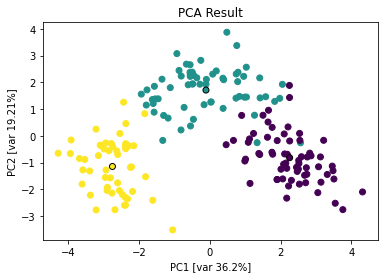

In [109]:
from sklearn.cluster import AffinityPropagation

AP=AffinityPropagation(damping=0.5, preference=-230,random_state=5).fit(nor_X)

print("Answer:",y)
print("Prediction:",corrected_label(nor_X,AP,cen_nor))
print("accuracy:",round(sum(y==corrected_label(nor_X,AP,cen_nor))/len(y)*100,2),"%")

plt.scatter(*(np.transpose(pca_nor_X)),c=AP.labels_)
plt.xlabel("PC1 [var "+str(round(pca.explained_variance_ratio_[0]*100,2))+'%]')
plt.ylabel("PC2 [var "+str(round(pca.explained_variance_ratio_[1]*100,2))+'%]')
plt.title("PCA Result")
cen_AP=[pca_nor_X[AP.labels_==idx].mean(axis=0) for idx in [0,1,2]]
plt.scatter(*(np.transpose(cen_AP)),c=[0,1,2],edgecolors='Black')
plt.show()

 AP는 두 점 사이의 responsibility와 availability를 비교하여 특정 점이 다른 한 점을 대표한다는 방식으로 특정 그룹을 대표하는 데이터를 찾는 방식이다 여기서 responsibility는 대표가 되어야 하는 지표, availability는 특정 데이터를 대표로 선정해야하는 지표를 나타낸다. 위 함수의 파라미터 preference는 자기 자신에 대한 유사도를 의미하며, cluster 개수를 결정하는 데 중요한 요인이 된다.
 이 방식 또한 kmean 보다 좋은 결과를 주지는 못하였지만, Kmean 방법을 제외했을 때 가장 좋은 결과를 주는 방법이다. 그러나 이 또한 그룹의 수를 결정해주는 것이 아니라서, 현재와 데이터 분류와 적합하지는 않다.

### Gaussian Mixture Model

In [126]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3).fit(nor_X)
gmm_cluster_labels = gmm.predict(nor_X)

In [127]:
print("Answer:",y)
print("label:",gmm_cluster_labels)

Answer: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
label: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [135]:
right_label=[1,0,2]
correction=map(lambda x: right_label[0] if x==list(set(kmeans.labels_))[0]
                    else right_label[1] if x==list(set(kmeans.labels_))[1]
                    else right_label[2],gmm_cluster_labels)
correction=np.array(list(correction))

In [136]:
print("Answer:",y)
print("Prediction:",correction)
print("accuracy:",round(sum(y==correction)/len(y)*100,2),"%")

Answer: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 0 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
accuracy: 95.51 %


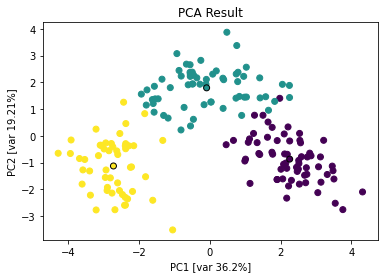

In [137]:
plt.scatter(*(np.transpose(pca_nor_X)),c=correction)
plt.xlabel("PC1 [var "+str(round(pca.explained_variance_ratio_[0]*100,2))+'%]')
plt.ylabel("PC2 [var "+str(round(pca.explained_variance_ratio_[1]*100,2))+'%]')
plt.title("PCA Result")
cen_gmm=[pca_nor_X[gmm_cluster_labels==idx].mean(axis=0) for idx in [0,1,2]]
plt.scatter(*(np.transpose(cen_gmm)),c=right_label,edgecolors='Black')
plt.show()

GMM은 데이터 분포가 Gaussian 분포라고 가정하고, 해당 데이터에 가장 잘 맞는 Gaussian 분포를 찾고 이를 기준으로 분류를 한다. 결과는 K-means clustering와 유사하지만, 적합한 Gaussian 분포를 찾는 것이기에 분류의 안정성이 K-means clustering보다 떨어진다.

### Spectral Clustering

In [160]:
SC_nor=SpectralClustering(n_clusters=3,affinity="rbf").fit(pca_nor_X)
print("Answer:",y,'\n')
print("Prediction:",corrected_label(pca_nor_X,SC_nor,cen_pca))
print("accuracy:",round(sum(y==corrected_label(pca_nor_X,SC_nor,cen_pca))/len(y)*100,2),"%")

Answer: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] 

Prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
accuracy: 97.75 %


[0, 1, 2] => [1, 2, 0]


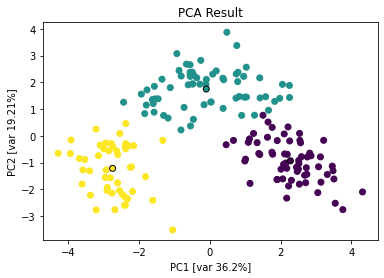

In [185]:
plt.scatter(*(np.transpose(pca_nor_X)),c=corrected_label(pca_nor_X,SC_nor,cen_pca,labels=True))
plt.xlabel("PC1 [var "+str(round(pca.explained_variance_ratio_[0]*100,2))+'%]')
plt.ylabel("PC2 [var "+str(round(pca.explained_variance_ratio_[1]*100,2))+'%]')
plt.title("PCA Result")
cen_SC=[pca_nor_X[SC_nor.labels_==idx].mean(axis=0) for idx in [0,1,2]]
plt.scatter(*(np.transpose(cen_SC)),c=[1,2,0],edgecolors='Black')
plt.show()

 SC(Spectral Clustering)은 그래프를 기반으로 분류하는 방식이다. 이 방법에서 먼저 그래프 간의 거리를 Gaussian kernel(rbf)를 수행하여 유사도 행렬을 구한다. 그 후에 이 유사도 행렬의 고유벡터를 찾는 문제를 풀어, 그래프에서 각 그룹을 분류하는 기준을 구하고, 이를 통해 그래프 위에 각 데이터를 분류를 한다. 이 방식 또한 클러스터 수를 넣어주어야 한다.
 normalization을 한 데이터를 SC하였을 때, 분류의 정확도는 97.75%로 전체 분류 중에서 제일 정확했으며, 그 수치 또한 안정적이다.

### Result: Wine Dataset Clustering Benchmark

|Method|Accuracy|Rank|
|:----:|:------:|:--:|
|PCA + Normalization+SP|97.75 %|1|
|Normalization + Kmean|96.63 %|2|
|PCA + Normalization + kmean|96.63 %|2|
|Normalization + GMM|95.51 %|3|
|T-SNE+ Normalization + DBSCAN|95.51 %|3|
|Normalization + AP|94.94 %|4|
|T-SNE+Normalization + HC|93.82 %|5|
|T-SNE+ Normalization + Kmean|93.26 %|6|
|Normalization + HC|92.7 %|7|
|Kmean|70.22 %|8|
|Normalization + DBSCAN|69.66 %|9|




Wine Dataset Clustering을 하기 위해 다양한 방식을 시도해 보았다. 그랬을 때, Wine Dataset에서는  Normalization을 한 후에 Spectral Clustering을 하는 것이 가장 정확하였고, 안정성도 뛰어났다. 그러나 해당 방식은 데이터 수가 많아지면 연산 수가 급격히 늘어난다는 단점이 있다. 따라서 Wine Dateset이 많은 경우는 데이터를 Normalization을 한 후에 K-means Clustering을 하는 것도 차선책으로 적합해 보인다. 그와 반면에 T-SNE를 이용한 방식은 T-SNE의 결과가 매 시도마다 달라지기에 그 수치가 높더라도, 안정성이 떨어져 신뢰하기 어렵다.

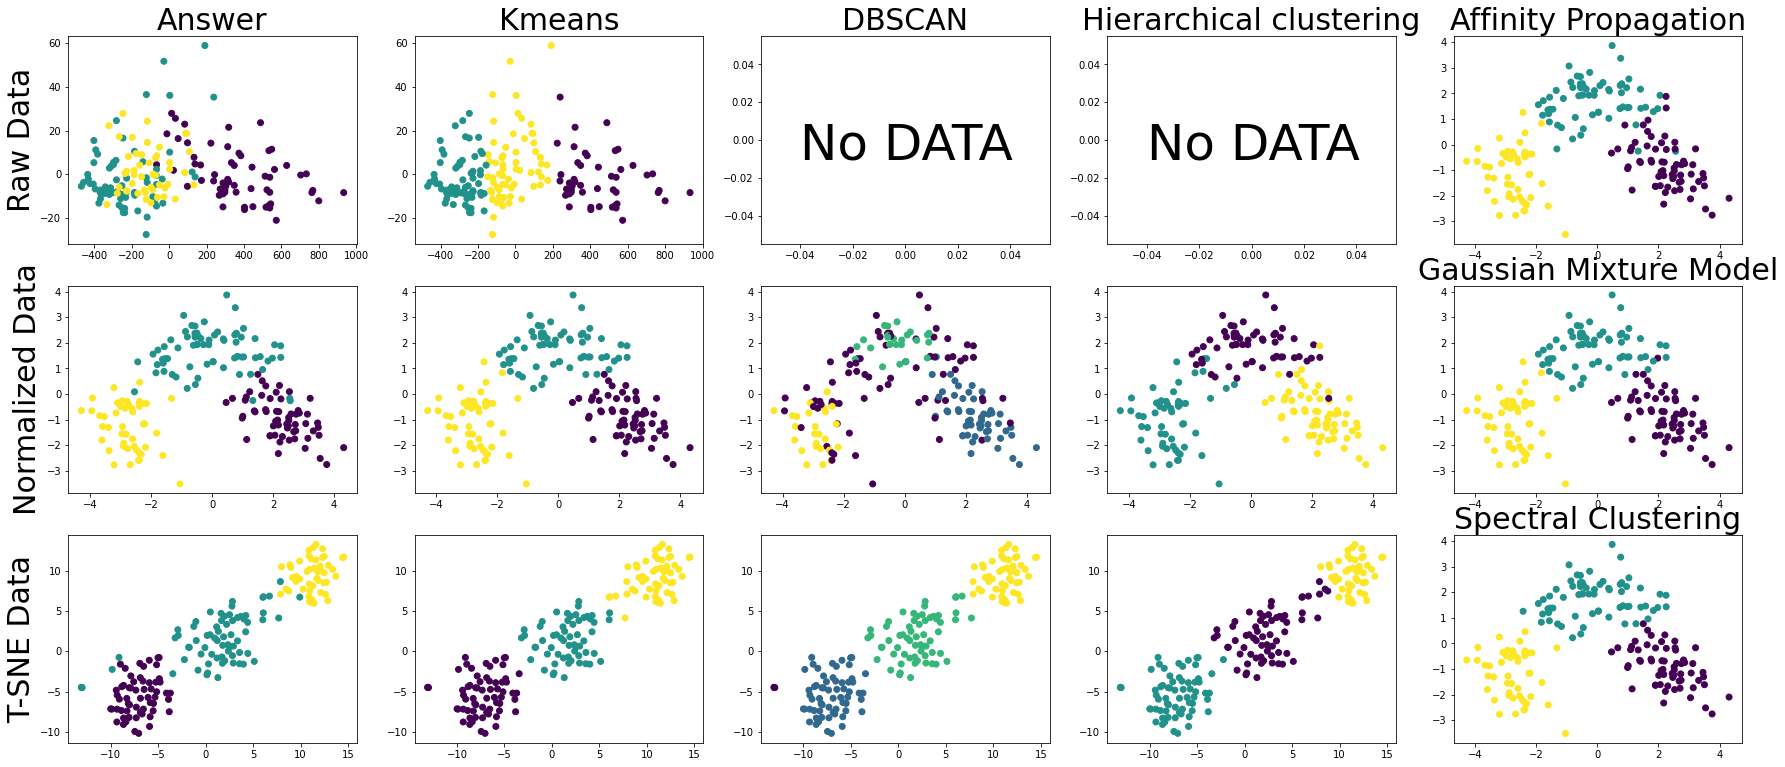

In [200]:
plt.figure(figsize=(30,13))

#Answer
plt.subplot(3,5,1)
plt.title("Answer",fontsize=30)
plt.scatter(*(np.transpose(pca_X)),c=y)
plt.ylabel("Raw Data",fontsize=30)
plt.subplot(3,5,6)
plt.scatter(*(np.transpose(pca_nor_X)),c=y)
plt.ylabel("Normalized Data",fontsize=30)
plt.subplot(3,5,11)
plt.scatter(*(np.transpose(tsne_nor_X)),c=y)
plt.ylabel("T-SNE Data",fontsize=30)

#Kmeans Clustering
plt.subplot(3,5,2)
plt.title("Kmeans",fontsize=30)
plt.scatter(*(np.transpose(pca_X)),c=corrected_label(X,kmeans,cen))
plt.subplot(3,5,7)
plt.scatter(*(np.transpose(pca_nor_X)),c=corrected_label(nor_X,kmeans_nor,cen_nor))
plt.subplot(3,5,12)
plt.scatter(*(np.transpose(tsne_nor_X)),c=corrected_label(tsne_nor_X,kmeans_tsne,cen_tsne))

#DBSCAN
plt.subplot(3,5,3)
plt.title("DBSCAN",fontsize=30)
plt.scatter(None,None)
plt.text(-0.04,-0.01,"No DATA",fontsize=50)
plt.subplot(3,5,8)
plt.scatter(*(np.transpose(pca_nor_X)),c=dbscan.labels_)
plt.subplot(3,5,13)
plt.scatter(*(np.transpose(tsne_nor_X)),c=dbscan_tsne.labels_)

#Hierarchical clustering
plt.subplot(3,5,4)
plt.title("Hierarchical clustering",fontsize=30)
plt.scatter(None,None)
plt.text(-0.04,-0.01,"No DATA",fontsize=50)
plt.subplot(3,5,9)
plt.scatter(*(np.transpose(pca_nor_X)),c=HC_nor.labels_)
plt.subplot(3,5,14)
plt.scatter(*(np.transpose(tsne_nor_X)),c=HC_tsne.labels_)

#Affinity Propagation
plt.subplot(3,5,5)
plt.title("Affinity Propagation",fontsize=30)
plt.scatter(*(np.transpose(pca_nor_X)),c=AP.labels_)

#Gaussian Mixture Model
plt.subplot(3,5,10)
plt.title("Gaussian Mixture Model",fontsize=30)
plt.scatter(*(np.transpose(pca_nor_X)),c=correction)

#Spectral Clustering
plt.subplot(3,5,15)
plt.title("Spectral Clustering",fontsize=30)
plt.scatter(*(np.transpose(pca_nor_X)),c=corrected_label(pca_nor_X,SC_nor,cen_pca))

모든 결과를 한번에 볼 수 있게 그래프를 그려 보았다. 그랬을 때, Raw Data를 그대로 사용하기 보다는 normalization을 하거나, T-SNE를 하여서 위치에 변화를 주는 것이 더 분류에 적합하다는 사실을 알 수 있다.

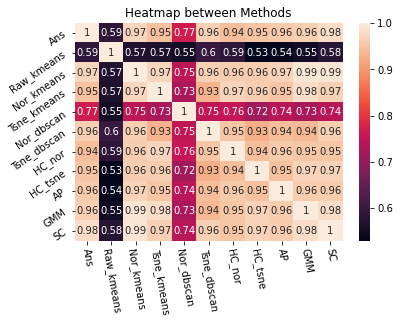

In [274]:
import pandas as pd
import seaborn as sns

df=pd.DataFrame({"Ans":y,
              "Raw_kmeans":corrected_label(X,kmeans,cen),
                 "Nor_kmeans":corrected_label(nor_X,kmeans_nor,cen_nor),
                 "Tsne_kmeans":corrected_label(tsne_nor_X,kmeans_tsne,cen_tsne),
                 "Nor_dbscan":corrected_label(nor_X,dbscan,cen_nor),
                 "Tsne_dbscan":corrected_label(tsne_nor_X,dbscan_tsne,cen_tsne),
              "HC_nor":corrected_label(nor_X,HC_nor,cen_nor),
                 "HC_tsne":corrected_label(tsne_nor_X,HC_tsne,cen_tsne),
             "AP":corrected_label(nor_X,AP,cen_nor),
                 "GMM":correction,
                 "SC":corrected_label(pca_nor_X,SC_nor,cen_pca)})


plt.title("Heatmap between Methods")
df_corr=df.corr()
sns.heatmap(df_corr, annot=True)
plt.xticks(rotation=-80)
plt.yticks(rotation=35)
plt.show()

각 방식들로 분류한 값들이 서로 얼마나 유사한지 Heatmap을 그려서 확인해 보았다. Heatmap를 보면, 성능이 아주 나쁜 Raw_kmeans와 Nor_dbscan을 제외하고, 서로 간의 높은 유사성을 보여준다. 이는 특정 몇 개의 데이터가 매우 분류하기 어렵다는 것을 의미한다.